# Problem 

   * Predict whether or not a customer will  cancel a room 

# Data 

   https://www.kaggle.com/jessemostipak/hotel-booking-demand
   
# Features 
   hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
   

# Evaluation Metric 

* AUC - ROC Curve

# Model 

* svm 
* logistic regression

# Metrics 

# Deployment 


In [38]:
#standard imports 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib

In [4]:
#read data from csv 
data=pd.read_csv('hotel_bookings.csv')

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#check missing values 
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(data)

Number of variables,32
Number of observations,119390
Total Missing (%),3.4%
Total size in memory,29.1 MiB
Average record size in memory,256.0 B
Numeric,18
Categorical,12
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [11]:
#drop  columns country:high cardinality:, reservation_status_date:high cardinality:,company:94.3% missing values

# Remove two columns name is 'Country' and 'reservation',company 
df=data.drop(['company', 'country','reservation_status_date'], axis = 1) 
  


In [12]:
#check agent column with missing value 
df['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
5         240.0
6           NaN
7         303.0
8         240.0
9          15.0
10        240.0
11        240.0
12        240.0
13        241.0
14        241.0
15        240.0
16          8.0
17        240.0
18          NaN
19        250.0
20        241.0
21        250.0
22        250.0
23        250.0
24        115.0
25          5.0
26          8.0
27        240.0
28        240.0
29        240.0
          ...  
119360      9.0
119361     16.0
119362      9.0
119363      7.0
119364      7.0
119365     14.0
119366      7.0
119367      7.0
119368     14.0
119369     14.0
119370      9.0
119371     42.0
119372     42.0
119373     42.0
119374      9.0
119375     16.0
119376      9.0
119377      9.0
119378     42.0
119379      9.0
119380      9.0
119381     14.0
119382      7.0
119383     42.0
119384    394.0
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119

In [13]:
#function to  Iterate through columns of Pandas DataFrame.Where NaNs exist replace with median
def impute_with_median (df):
    """Iterate through columns of Pandas DataFrame.
    Where NaNs exist replace with median"""
    
    # Get list of DataFrame column names
    cols = list(df)
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df   


In [14]:
df_imputed=impute_with_median(df)

In [15]:
# check null
df_imputed.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df_imputed.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,23,35,68,18,37,68,37,12,0,7
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,4,4,4,4,4,4,4,1,1,4
adults,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [17]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 n

In [18]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        #enc = OneHotEncoder(handle_unknown='ignore')
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
                #df[feature]=enc.fit_transform(df[feature])
                
            except:
                print('Error encoding '+feature)
        return df

In [19]:
dataset_encoded= dummyEncode(df_imputed)

In [20]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
hotel                             119390 non-null int32
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null int32
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null int32
market_segment                    119390 non-null int32
distribution_channel              119390 non-null int32
is_repeated_guest                 119390 non-nu

In [21]:
# spliting the dataset into Training and Test set
from sklearn.model_selection import train_test_split

X=dataset_encoded.drop(columns = 'is_canceled')
y=dataset_encoded['is_canceled']

# generate the datasets for training. Test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [22]:
# balancing the training Set

#Counting and watching the Y_train distribution 
y_train.value_counts()

0    60232
1    35280
Name: is_canceled, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
# generate an standarScalar
sc_X = StandardScaler()

#StandardScaler return a Numpy Array so we need to convert to a Dataframe
X_train2= pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

#copy columns name to the new traning and testing dataset
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#copy index to the new traning and testing dataset
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# reasigned copy dataset to original
X_train = X_train2
X_test = X_test2

C:\Users\t\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\t\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\t\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\t\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
55159,-0.711604,-0.353477,-0.220330,-1.268112,0.355162,-1.112164,1.073346,-0.261760,1.960833,-0.261105,...,0.888159,2.735196,-0.372364,-0.639807,-0.131169,-0.235593,1.381860,-0.254630,-0.719915,-1.308277
56190,-0.711604,-0.494220,-0.220330,-1.268112,0.649456,1.733049,0.073303,0.782415,0.247857,-0.261105,...,0.888159,-0.340163,-0.372364,-0.639807,-0.131169,-0.235593,0.447139,-0.254630,-0.719915,-1.308277
97444,-0.711604,-0.766324,-0.220330,1.559599,0.796602,-0.087887,-0.926740,-0.783847,-1.465119,-0.261105,...,-0.175818,-0.340163,-0.372364,-0.639807,-0.131169,-0.235593,0.980968,-0.254630,1.801141,0.702863
64854,-0.711604,-0.325328,1.192788,0.428515,-1.189878,0.139730,1.073346,0.260328,0.247857,4.768371,...,1.952137,2.735196,-0.372364,-0.639807,-0.131169,-0.235593,1.064055,-0.254630,-0.719915,-1.308277
110580,-0.711604,-0.841387,1.192788,-1.550883,-0.748438,1.050198,-0.926740,0.782415,0.247857,4.768371,...,2.484126,-0.340163,-0.372364,-0.592602,-0.131169,-0.235593,4.626378,3.812975,1.801141,0.702863


In [25]:
### Model building ###

# Fitting Model to the Traninig Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.9889437976379931

In [26]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9986598542591507

In [27]:
# Evaluating Test set
y_pred = clf.predict(X_test)

In [28]:
# Evaluating Result
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9986598542591507

In [30]:

# precision score (When is 0 and should be 1 and the other way round)
precision_score(y_test, y_pred)

0.9998878169172088

In [31]:
# recall score
recall_score(y_test, y_pred)

0.9965339892665475

In [32]:
f1_score(y_test, y_pred)

0.9982080860118714

Accuracy 0.9987


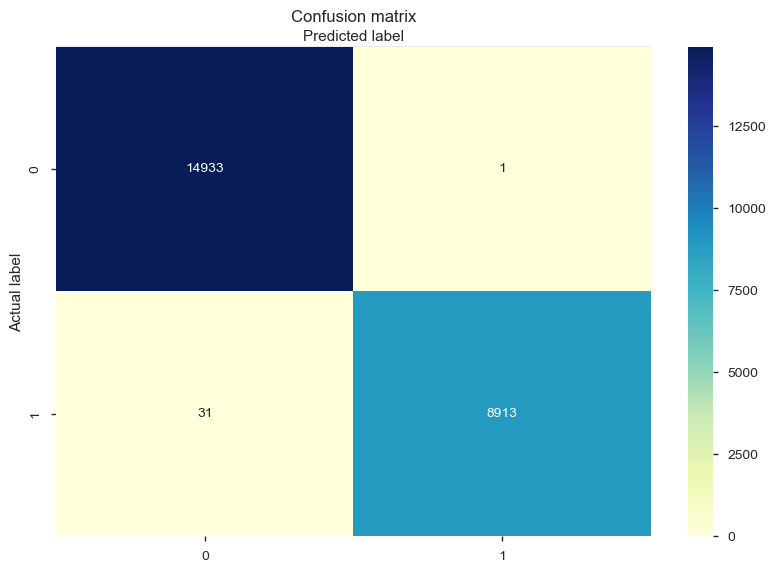

In [33]:
# cnf matrix drawing
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy %0.4f" % accuracy_score(y_test, y_pred))

svm: ROC AUC=0.998


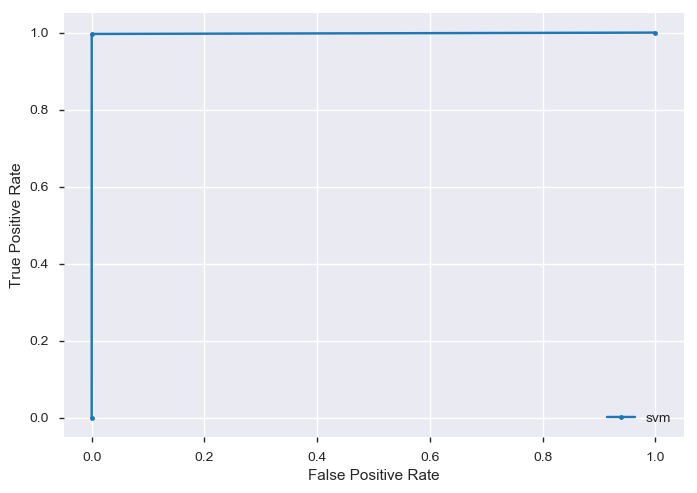

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('svm: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14934
           1       1.00      1.00      1.00      8944

   micro avg       1.00      1.00      1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [40]:

# save the model to disk
filename = 'hotel_model.sav'
joblib.dump(clf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9986598542591507
